Source
------
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

Statement
---------
Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.

Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.

Hint: You can use the decision_function method on a grid to get intuitions.

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    X = X[y != 0, :2]
    y = y[y != 0]

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

In [2]:
import numpy as np

# let's be predictable
np.random.seed(1)

n = len(X)
k = int(n * 0.1)
permutation = np.random.permutation(len(X))

# shuffle X and y
X = X[permutation]
y = y[permutation].astype(np.float)

# Now we have our train and test data
X_train, X_test = X[:-k], X[-k:]
y_train, y_test = y[:-k], y[-k:]

In [3]:
from sklearn import svm
model = svm.SVC(decision_function_shape='ovo')
model.fit(X_train, y_train).score(X_test, y_test)

0.7

Correction
----------

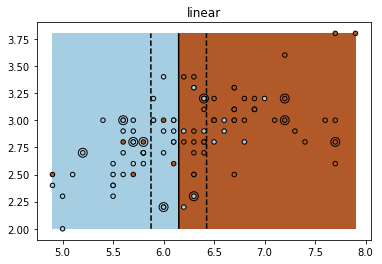

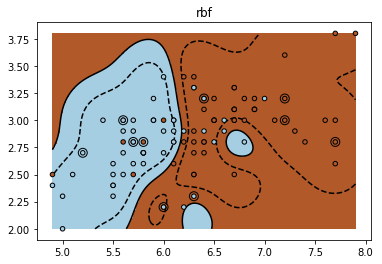

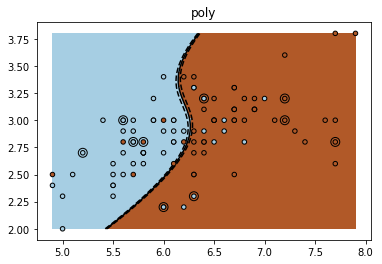

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt

for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

Enhancements
------------

4.9 7.9 2.0 3.8
4.9 7.9 2.0 3.8
4.9 7.9 2.0 3.8


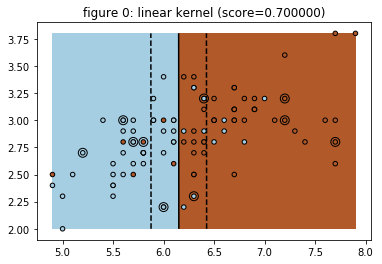

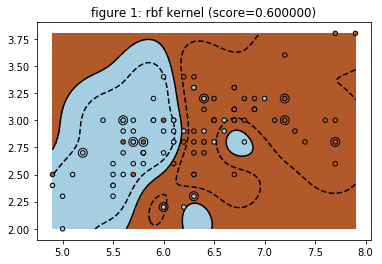

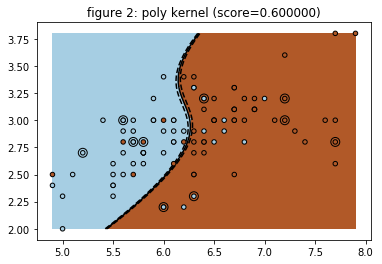

In [12]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    print(x_min, x_max, y_min, y_max)
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("figure %d: %s kernel (score=%f)" % (fig_num, kernel, score))
plt.show()